In [4]:
import pandas as pd
import glob

import xarray as xr   # xarray pacckage for netcdf io and data processing
import glob           # allow unix shell like text
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates

import xarray as xr
from matplotlib.pylab import plt
xr.set_options(display_style="html")
%matplotlib inline

In [5]:
# Model Input preparation

#input comparison:
#variables:
#FunCaB_clean_composition_2015-2019.csv: "plant cover" , "moss height"
#soilCN_2015.csv:
#Water holding capacity:

# 1. Atm forcing (2015-2016): Using COSMO reanalysis or ERA-land or CRUNCEP

fatm=sorted(glob.glob('/home/huitang/saga/work/BOR4/clm1pt_BOR4_*.nc'))
datm=xr.open_mfdataset(fatm,concat_dim='time',combine='nested',decode_times=True)

atm_obs=pd.read_csv("/home/huitang/Documents/MossLichen_testbed/data_raw/GriddedDailyClimateData2009-2019.csv", index_col=None, header=0)
atm_obs2=pd.read_csv("/home/huitang/Documents/MossLichen_testbed/data_raw/Temperature/Temperature.csv", index_col=None, header=0)
atm_obs3=pd.read_csv("/home/huitang/Documents/MossLichen_testbed/data_raw/Precipitation/Precipitation.csv", index_col=None, header=0)

/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


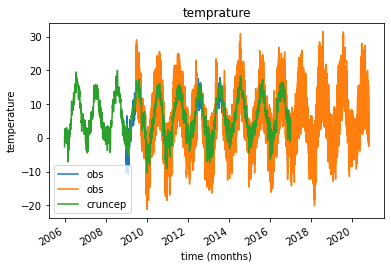

In [603]:
# Quality check with observation: air temperature

atm_obs_sel=atm_obs[(atm_obs["siteID"]=="Ovstedalen")
                             & (atm_obs["variable"]=="temperature")]
time_obs=pd.to_datetime(atm_obs_sel["date"])
atm_obs2_sel=atm_obs2[(atm_obs2["siteID"]=="Ovstedalen")
                            & (atm_obs2["logger"]=="temp200cm")]
time_obs2=pd.to_datetime(atm_obs2_sel["date"])
atm_daily=datm["TBOT"].resample(time='1D').mean()-273.15

plt.plot(time_obs,atm_obs_sel['value'],label='obs grid')
plt.plot(time_obs2,atm_obs2_sel['value'],label='obs ')
plt.plot(atm_daily.time,atm_daily[:,0,0].data,label='cruncep')
#plt.plot(soil_temp_grass_rs.index,soil_temp_grass_rs['soiltemperature'],label='grass')
#plt.plot(ALP1_moss3['TSOI_10CM']-273.15,label='moss_test3')

plt.gcf().autofmt_xdate()

plt.xlabel("time (months)")
plt.ylabel("temperature")
plt.title("temprature")
plt.legend(loc='best')
#plt.grid(True)
plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/daily_temp.png")
plt.show()

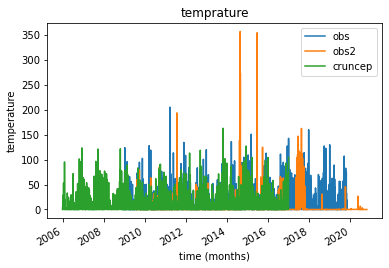

In [25]:
# Quality check with observation: precipitation

atm_obs_sel=atm_obs[(atm_obs["siteID"]=="Ovstedalen")
                             & (atm_obs["variable"]=="precipitation")]
time_obs=pd.to_datetime(atm_obs_sel["date"])
atm_obs3["date"]=pd.to_datetime(atm_obs3["date"])
atm_obs3_sel=(atm_obs3[(atm_obs3["siteID"]=="Ovstedalen")]).resample('D', on="date").sum()
#time_obs3=pd.to_datetime(atm_obs3_sel["date"])
atm_daily=(datm["PRECTmms"].resample(time='1D').mean())*3600*24

plt.plot(time_obs,atm_obs_sel['value'],label='obs')
plt.plot(atm_obs3_sel.index,atm_obs3_sel['precipitation'],label='obs2')
plt.plot(atm_daily.time,atm_daily[:,0,0].data,label='cruncep')
#plt.plot(soil_temp_grass_rs.index,soil_temp_grass_rs['soiltemperature'],label='grass')
#plt.plot(ALP1_moss3['TSOI_10CM']-273.15,label='moss_test3')

plt.gcf().autofmt_xdate()

plt.xlabel("time (months)")
plt.ylabel("precipitation")
plt.title("precipitation")
plt.legend(loc='best')
#plt.grid(True)
plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/daily_precip.png")
plt.show()

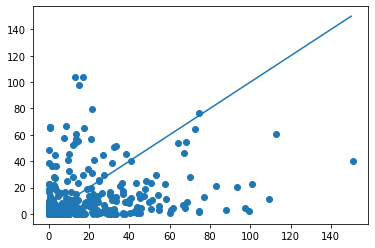

In [27]:
# further check if precipitation matches observation:
plt.scatter(atm_obs_sel.iloc[2190:2555]['value'],atm_daily[3285:3650,0,0],label='obs')
#plt.plot(atm_obs3_sel.index,atm_obs3_sel['precipitation'],label='obs2')
#plt.plot(atm_daily.time,atm_daily[:,0,0].data,label='cruncep')

x = np.linspace(0,150,300)
plt.plot(x, x)

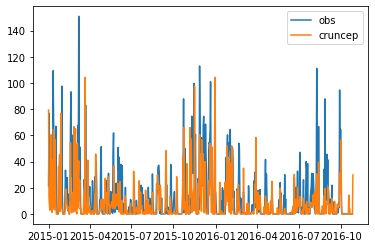

In [107]:
plt.plot(time_obs[2190:2855],atm_obs_sel.iloc[2190:2855]['value'],label='obs')
#plt.plot(atm_obs3_sel.index[2002:2367],atm_obs3_sel['precipitation'][2002:2367],label='obs2')
plt.plot(atm_daily.time[3285:3950],atm_daily[3285:3950,0,0].data,label='cruncep')
plt.legend(loc='best')

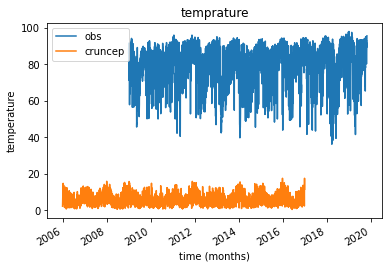

In [7]:
# Quality check with observation: wind

atm_obs_sel=atm_obs[(atm_obs["siteID"]=="Ovstedalen")
                             & (atm_obs["variable"]=="wind")]
time_obs=pd.to_datetime(atm_obs_sel["date"])
#atm_obs3["date"]=pd.to_datetime(atm_obs3["date"])
#atm_obs3_sel=(atm_obs3[(atm_obs3["siteID"]=="Ovstedalen")]).resample('D', on="date").sum()
#time_obs3=pd.to_datetime(atm_obs3_sel["date"])
atm_daily=(datm["WIND"].resample(time='1D').mean())

plt.plot(time_obs,atm_obs_sel['value'],label='obs')
#plt.plot(atm_obs3_sel.index,atm_obs3_sel['precipitation'],label='obs2')
plt.plot(atm_daily.time,atm_daily[:,0,0].data,label='cruncep')
#plt.plot(soil_temp_grass_rs.index,soil_temp_grass_rs['soiltemperature'],label='grass')
#plt.plot(ALP1_moss3['TSOI_10CM']-273.15,label='moss_test3')

plt.gcf().autofmt_xdate()

#plt.xlabel("time (months)")
#plt.ylabel("temperature")
plt.title("temprature")
plt.legend(loc='best')
#plt.grid(True)
plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/daily_wind.png")
plt.show()

In [38]:
# 2. Surface file modification:
# xarray can not do the job: https://github.com/pydata/xarray/issues/1117
# have to use netCDF4 package instead
import netCDF4
import locale          # This is needed to read number in different language or region format correctly

locale.setlocale(locale.LC_ALL, 'nn_NO.utf8')  
# locale.getlocale() # get local language 
# can use shell command to check all the available language format in the system: locale -a  
# test=locale.atof(soil_bd_sel["BD"].iloc[1])  # This can convert , number to . number automatically

# Currently, files are downloaded first from OSF and read
# In future, it will be possible to use osf api to directly fetch files needed: 
# see: https://osfclient.readthedocs.io/en/latest/api/osfclient.html#module-osfclient.cli

# Open observation data file to extract the corresponding values
# File containing vegetation cover info
plant_comp=pd.read_csv("/home/huitang/Documents/MossLichen_testbed/data_raw/FunCaB_clean_composition_2015-2019.csv", index_col=None, header=0)

# File contain soil organic matter info
soil_org=pd.read_csv("/home/huitang/Documents/MossLichen_testbed/data_raw/soilCN_2015.txt", index_col=None, header=0, sep='\t')

soil_bd=pd.read_csv("/home/huitang/Documents/MossLichen_testbed/data_raw/soilBD.txt", index_col=None, header=0, sep='\t').dropna()

# File contain soil depth and texture, etc
soil_info=pd.read_csv("/home/huitang/Documents/MossLichen_testbed/data_raw/Soil_structure_2013-2018_clean.csv", index_col=None, header=0)

#"Soil_structure_2013-2018_clean.csv"
#"soilCN_2015.txt"

In [62]:
# Extract useful information from observation data

siteID="Ovstedalen"                                  #"Ulvehaugen"
blockID=['Ovs1','Ovs2','Ovs3']                #"Ulv2"  isin(['Mangos', 'Grapes'])
treatment="FGB" 
# Bareground: "FGB"
# Moss: "GF" 
# GRASS (Graminoid and Forbs) only: "B"   

plant_comp_sel=plant_comp[(plant_comp["siteID"]==siteID) & (plant_comp["treatment"]==treatment)
                             & (plant_comp["blockID"].isin(blockID))]

soil_org_sel=soil_org[(soil_org["siteID"]=="OVS")
                             & (soil_org["blockID"].isin(['1','2','3']))]
soil_bd_sel=soil_bd[(soil_bd["siteID"]=="OVS")] 

soil_info_sel=soil_info[(soil_info["siteID"]=="Ovstedalen") & (soil_info["variable"]=="soil_depth")] 

# Number from bulk density is in "comma", need to replace to dot
# Follow the instruction here: https://herrmann.tech/en/blog/2021/02/05/how-to-deal-with-international-data-formats-in-python.html

# Bulk density: g/cm3, Carbon content: %, organic: kg/m3
bd_obs=soil_bd_sel[soil_bd_sel["depth"]=="8"]["BD"].str.replace(',','.').astype(float).mean()  #["BD"].mean()
c_obs=soil_org_sel[soil_org_sel["depth"]==10]["C"].str.replace(',','.').astype(float).mean()
org_obs=bd_obs*c_obs/100/1000*1000000/0.58

# Soil depth
sd_obs=soil_info_sel["value"].mean()  # cm
#
#plant_comp_moss=plant_comp[(plant_comp["siteID"]==siteID) & (plant_comp["treatment"]==treatment2)
#                             & (plant_comp["blockID"].isin(blockID))]

##soil_temp_alp1_moss=soil_temp_alp1.loc[soil_temp_alp1["treatment"]=="GF"]
##filterinfDataframe = dfObj[(dfObj['Sale'] > 30) & (dfObj['Sale'] < 33) ]
##soil_temp_alp1_bare
#plant_comp_grass=plant_comp[(plant_comp["siteID"]==siteID) & (plant_comp["treatment"]==treatment3)
#                             & (plant_comp["blockID"].isin(blockID))]


In [108]:
# Set up surface data file for BOR4 site: bareground - FGB

# Open the surface data file to modify
bor4_surf = xr.open_dataset('/home/huitang/saga/work/inputdata/lnd/clm2/surfdata_map/BOR4/surfdata_BOR4_simyr2000_bare.nc',decode_times=False)#BOR4
dset = netCDF4.Dataset('/home/huitang/saga/work/inputdata/lnd/clm2/surfdata_map/BOR4/surfdata_BOR4_simyr2000_bare.nc', 'r+')

# Modify percentage vegetation cover of plot
dset['PCT_NAT_PFT'][0,:,:] = 100
dset['PCT_NAT_PFT'][1:15,:,:] = 0
dset['PCT_NATVEG'][:,:] = 100
dset['PCT_CROP'][:,:] = 0
dset['PCT_CFT'][:,:,:] = 0
dset['PCT_WETLAND'][:,:] = 0
dset['PCT_LAKE'][:,:] = 0
dset['PCT_GLACIER'][:,:] = 0
dset['PCT_URBAN'][:,:,:] = 0

# Modify soil properties
dset['ORGANIC'][0:3,:,:] = org_obs        # Too much effort, leave for future
#dset['PCT_SAND'][:,:,:] = 0
#dset['PCT_CLAY'][:,:,:] = 0
dset['zbedrock'][:,:] = sd_obs/100       # Modify soil depth:

# Modify satellite phenology
#dset['MONTHLY_LAI'][:,:,:,:] = 0
#dset['MONTHLY_SAI'][:,:,:,:] = 0
#dset['MONTHLY_HEIGHT_TOP'][:,1,:,:] = 0
#dset['MONTHLY_HEIGHT_BOT'][:,1,:,:] = 0

# Modify topography
dset['SLOPE'][:,:] = 0

dset.close()

In [110]:
# Set up surface data file for BOR4 site: moss - GF

# Open the surface data file to modify
#bor4_surf = xr.open_dataset('/home/huitang/saga/work/inputdata/lnd/clm2/surfdata_map/BOR4/surfdata_BOR4_simyr2000_bare.nc',decode_times=False)#BOR4
dset = netCDF4.Dataset('/home/huitang/saga/work/inputdata/lnd/clm2/surfdata_map/BOR4/surfdata_BOR4_simyr2000_moss.nc', 'r+')

plant_comp_sel=plant_comp[(plant_comp["siteID"]==siteID) & (plant_comp["treatment"]=="GF")
                             & (plant_comp["blockID"].isin(blockID))]  #& (plant_comp["year"]==2015)
plant_cover_obs=(90+95+75)/3
plant_height_obs=(37.5+20+11)/3

# Modify percentage vegetation cover of plot
dset['PCT_NAT_PFT'][0,:,:] = 100-plant_cover_obs
dset['PCT_NAT_PFT'][1,:,:] = plant_cover_obs
dset['PCT_NAT_PFT'][2:15,:,:] = 0
dset['PCT_NATVEG'][:,:] = 100
dset['PCT_CROP'][:,:] = 0
dset['PCT_CFT'][:,:,:] = 0
dset['PCT_WETLAND'][:,:] = 0
dset['PCT_LAKE'][:,:] = 0
dset['PCT_GLACIER'][:,:] = 0
dset['PCT_URBAN'][:,:,:] = 0

# Modify soil properties
dset['ORGANIC'][0:3,:,:] = org_obs        # Too much effort, leave for future
#dset['PCT_SAND'][:,:,:] = 0
#dset['PCT_CLAY'][:,:,:] = 0
dset['zbedrock'][:,:] = sd_obs/100       # Modify soil depth:

# Modify satellite phenology
dset['MONTHLY_LAI'][:,1,:,:] = 2.0
dset['MONTHLY_SAI'][:,1,:,:] = 0.5
dset['MONTHLY_HEIGHT_TOP'][:,1,:,:] = plant_height_obs/1000
dset['MONTHLY_HEIGHT_BOT'][:,1,:,:] = 0.001/1000

# Modify topography
dset['SLOPE'][:,:] = 0

dset.close()

In [109]:
# Set up surface data file for BOR4 site: grass - B

# Open the surface data file to modify
#bor4_surf = xr.open_dataset('/home/huitang/saga/work/inputdata/lnd/clm2/surfdata_map/BOR4/surfdata_BOR4_simyr2000_bare.nc',decode_times=False)#BOR4
dset = netCDF4.Dataset('/home/huitang/saga/work/inputdata/lnd/clm2/surfdata_map/BOR4/surfdata_BOR4_simyr2000_grass.nc', 'r+')

plant_comp_sel=plant_comp[(plant_comp["siteID"]==siteID) & (plant_comp["treatment"]=="B")
                             & (plant_comp["blockID"].isin(blockID)) & (plant_comp["year"]==2015)]  #
plant_cover_obs=plant_comp_sel["total_graminoids"]+plant_comp_sel["total_forbs"]
plant_cover_obs=(145+73+48)/3
plant_height_obs=(130+95+130)/3

# Modify percentage vegetation cover of plot
dset['PCT_NAT_PFT'][0,:,:] = 100-plant_cover_obs
dset['PCT_NAT_PFT'][1:12,:,:] = 0
dset['PCT_NAT_PFT'][12,:,:] = plant_cover_obs
dset['PCT_NAT_PFT'][13:15,:,:] = 0
dset['PCT_NATVEG'][:,:] = 100
dset['PCT_CROP'][:,:] = 0
dset['PCT_CFT'][:,:,:] = 0
dset['PCT_WETLAND'][:,:] = 0
dset['PCT_LAKE'][:,:] = 0
dset['PCT_GLACIER'][:,:] = 0
dset['PCT_URBAN'][:,:,:] = 0

# Modify soil properties
dset['ORGANIC'][0:3,:,:] = org_obs        # Too much effort, leave for future
#dset['PCT_SAND'][:,:,:] = 0
#dset['PCT_CLAY'][:,:,:] = 0
dset['zbedrock'][:,:] = sd_obs/100       # Modify soil depth:

# Modify satellite phenology
#dset['MONTHLY_LAI'][:,:,:,:] = 0
#dset['MONTHLY_SAI'][:,:,:,:] = 0
dset['MONTHLY_HEIGHT_TOP'][:,12,:,:] = plant_height_obs/1000
dset['MONTHLY_HEIGHT_BOT'][:,12,:,:] = 0.001/1000

# Modify topography
dset['SLOPE'][:,:] = 0

dset.close()

In [81]:
# Model output and comparison with observation

# Model output
BOR4_bare = xr.open_dataset('/home/huitang/saga/work/ctsm/BOR4_bare/run/BOR4_bare.clm2.h0.2015-2016.nc',decode_times=True)#alp1
BOR4_grass = xr.open_dataset('/home/huitang/saga/work/ctsm/BOR4_grass/run/BOR4_grass.clm2.h0.2015-2016.nc',decode_times=True)#alp1
BOR4_moss = xr.open_dataset('/home/huitang/saga/work/ctsm/BOR4_moss/run/BOR4_moss.clm2.h0.2015-2016.nc',decode_times=True)#alp1
BOR4_moss_soil = xr.open_dataset('/home/huitang/saga/work/ctsm/BOR4_moss_soil/run/BOR4_moss_soil.clm2.h0.2015-2016.nc',decode_times=True)#alp1

# Observation

cflux=pd.read_csv("/home/huitang/Documents/MossLichen_testbed/data_raw/FunCaB_clean_Cflux_2015-2017.csv", index_col=None, header=0)
soil_moist=pd.read_csv("/home/huitang/Documents/MossLichen_testbed/data_raw/FunCaB_clean_soilMoisture_2015-2019.csv", index_col=None, header=0)
soil_temp=pd.read_csv("/home/huitang/Documents/MossLichen_testbed/data_raw/FunCaB_clean_soiltemperature_2015-2016.csv", index_col=None, header=0)


In [73]:
#output comparison
#variables: "soiltemperature": 3-5 cm soil depth, hourly output
#           "soilmoisture": soilmoisture, daily output
#           "PAR" "gpp" "nee" "Reco":

siteID="Ovstedalen"                                  #"Ulvehaugen"
blockID=['Ovs1','Ovs2','Ovs3']                #"Ulv2"  isin(['Mangos', 'Grapes'])
treatment1="FGB" # Bareground
treatment2="GF"  # Moss only
treatment3="B"   # GRASS (Graminoid and Forbs) only

soil_temp_bare=soil_temp[(soil_temp["siteID"]==siteID) & (soil_temp["treatment"]==treatment1)
                             & (soil_temp["blockID"].isin(blockID))]
soil_temp_moss=soil_temp[(soil_temp["siteID"]==siteID) & (soil_temp["treatment"]==treatment2)
                             & (soil_temp["blockID"].isin(blockID))]
soil_temp_grass=soil_temp[(soil_temp["siteID"]==siteID) & (soil_temp["treatment"]==treatment3)
                             & (soil_temp["blockID"].isin(blockID))]


soil_moist_bare=soil_moist[(soil_moist["siteID"]==siteID) & (soil_moist["treatment"]==treatment1)
                             & (soil_moist["blockID"].isin(blockID))]
soil_moist_moss=soil_moist[(soil_moist["siteID"]==siteID) & (soil_moist["treatment"]==treatment2)
                             & (soil_moist["blockID"].isin(blockID))]
soil_moist_grass=soil_moist[(soil_moist["siteID"]==siteID) & (soil_moist["treatment"]==treatment3)
                             & (soil_moist["blockID"].isin(blockID))]

cflux_bare=cflux[(cflux["siteID"]==siteID) & (cflux["treatment"]==treatment1)
                             & (cflux["blockID"].isin(blockID))]
cflux_moss=cflux[(cflux["siteID"]==siteID) & (cflux["treatment"]==treatment2)
                             & (cflux["blockID"].isin(blockID))]
cflux_grass=cflux[(cflux["siteID"]==siteID) & (cflux["treatment"]==treatment3)
                             & (cflux["blockID"].isin(blockID))]


In [75]:
# Set correct date format for dataframe

soil_temp_bare["date_time"]=pd.to_datetime(soil_temp_bare["date_time"])
soil_temp_moss["date_time"]=pd.to_datetime(soil_temp_moss["date_time"])
soil_temp_grass["date_time"]=pd.to_datetime(soil_temp_grass["date_time"])

# Resample observation data to daily or monthly mean
soil_temp_bare_rs=soil_temp_bare.resample('D', on="date_time").mean()
soil_temp_moss_rs=soil_temp_moss.resample('D', on="date_time").mean()
soil_temp_grass_rs=soil_temp_grass.resample('D', on="date_time").mean()

# Output processed observation data to csv
soil_temp_bare_rs.to_csv('/home/huitang/Documents/MossLichen_testbed/data_mod/BOR4_bare_soiltemperature_2015-2016_daily.csv')
soil_temp_moss_rs.to_csv('/home/huitang/Documents/MossLichen_testbed/data_mod/BOR4_moss_soiltemperature_2015-2016_daily.csv')
soil_temp_grass_rs.to_csv('/home/huitang/Documents/MossLichen_testbed/data_mod/BOR4_grass_soiltemperature_2015-2016_daily.csv')

<ipython-input-75-f6b5a52b9370>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soil_temp_bare["date_time"]=pd.to_datetime(soil_temp_bare["date_time"])
<ipython-input-75-f6b5a52b9370>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soil_temp_moss["date_time"]=pd.to_datetime(soil_temp_moss["date_time"])
<ipython-input-75-f6b5a52b9370>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

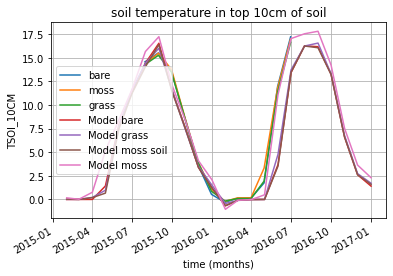

In [89]:
# Soil temperature and comparison with observation
#plt.figure(figsize=(8,8))
#plt.plot(ALP1_lichen['SABG'],label='lichen')
#plt.plot(ALP1_lichen1['SABG'],label='lichen')
#plt.plot(ALP1_lichen2['SABG'],label='lichen')
#plt.plot(ALP1_moss1['TSOI_10CM']-273.15,label='moss_test1')
#plt.plot(ALP1_moss3['TSOI_10CM']-273.15,label='moss_test3')
BOR4_bare['TSOI'].time
plt.plot(soil_temp_bare_rs.index,soil_temp_bare_rs['soiltemperature'],label='bare')
plt.plot(soil_temp_moss_rs.index,soil_temp_moss_rs['soiltemperature'],label='moss')
plt.plot(soil_temp_grass_rs.index,soil_temp_grass_rs['soiltemperature'],label='grass')
plt.plot(BOR4_bare['TSOI'].time,BOR4_bare['TSOI'][:,1,0].data-273.15,label='Model bare')
plt.plot(BOR4_grass['TSOI'].time,BOR4_grass['TSOI'][:,1,0].data-273.15,label='Model grass')
plt.plot(BOR4_moss_soil['TSOI'].time,BOR4_moss_soil['TSOI'][:,1,0].data-273.15,label='Model moss soil')
plt.plot(BOR4_moss['TSOI'].time,BOR4_moss['TSOI'][:,1,0].data-273.15,label='Model moss')

plt.gcf().autofmt_xdate()

plt.xlabel("time (months)")
plt.ylabel("TSOI_10CM")
plt.title("soil temperature in top 10cm of soil")
plt.legend(loc='best')
plt.grid(True)
plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/monthly_TSOI_10CM.png")
plt.show()

<ipython-input-95-20c2c829ffc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soil_moist_bare["date"]=pd.to_datetime(soil_moist_bare["date"])
<ipython-input-95-20c2c829ffc2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soil_moist_moss["date"]=pd.to_datetime(soil_moist_moss["date"])
<ipython-input-95-20c2c829ffc2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

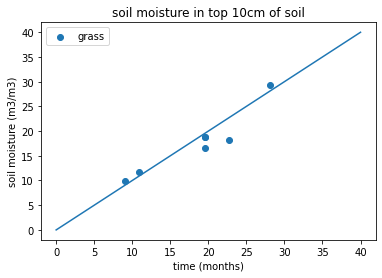

In [95]:
# Soil moisture

soil_moist_bare["date"]=pd.to_datetime(soil_moist_bare["date"])
soil_moist_moss["date"]=pd.to_datetime(soil_moist_moss["date"])
soil_moist_grass["date"]=pd.to_datetime(soil_moist_grass["date"])

soil_moist_bare_rs=soil_moist_bare.resample('D', on="date").mean()
soil_moist_moss_rs=soil_moist_moss.resample('D', on="date").mean()
soil_moist_grass_rs=soil_moist_grass.resample('D', on="date").mean()

#plt.figure(figsize=(8,8))
#plt.plot(ALP1_lichen['SABG'],label='lichen')
#plt.plot(ALP1_lichen1['SABG'],label='lichen')
#plt.plot(ALP1_lichen2['SABG'],label='lichen')
#plt.plot(ALP1_moss1['TSOI_10CM']-273.15,label='moss_test1')
#plt.plot(ALP1_moss3['TSOI_10CM']-273.15,label='moss_test3')
#plt.scatter(soil_moist_bare_rs.loc['2015-1-1':'2019-12-31'].index,
#            soil_moist_bare_rs.loc['2015-1-1':'2019-12-31']['soilmoisture'],label='bare')
#plt.scatter(soil_moist_moss_rs.loc['2015-1-1':'2019-12-31'].index,
 #           soil_moist_moss_rs.loc['2015-1-1':'2019-12-31']['soilmoisture'],label='moss')
#plt.scatter(soil_moist_grass_rs.loc['2015-1-1':'2019-12-31'].index,
#            soil_moist_grass_rs.loc['2015-1-1':'2019-12-31']['soilmoisture'],label='grass')
#plt.plot(ALP1_moss3['TSOI_10CM']-273.15,label='moss_test3')
plt.scatter(soil_moist_moss_rs.loc['2015-1-1':'2015-12-31']['soilmoisture'],
            soil_moist_bare_rs.loc['2015-1-1':'2015-12-31']['soilmoisture'],label='grass')

x = np.linspace(0,40,100)
plt.plot(x, x)

plt.xlabel("time (months)")
plt.ylabel("soil moisture (m3/m3)")
plt.title("soil moisture in top 10cm of soil")
plt.legend(loc='best')
#plt.grid(True)
plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/monthly_TSOI_10CM.png")
plt.show()

<ipython-input-104-2305e2daf00c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cflux_bare["date"]=pd.to_datetime(cflux_bare["date"])
<ipython-input-104-2305e2daf00c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cflux_moss["date"]=pd.to_datetime(cflux_moss["date"])
<ipython-input-104-2305e2daf00c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

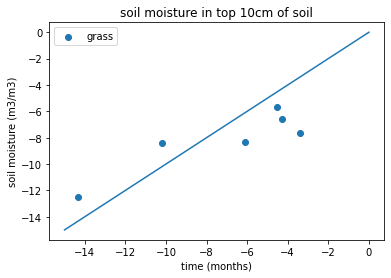

In [104]:
# Carbon flux and comparison with observation

cflux_bare["date"]=pd.to_datetime(cflux_bare["date"])
cflux_moss["date"]=pd.to_datetime(cflux_moss["date"])
cflux_grass["date"]=pd.to_datetime(cflux_grass["date"])

cflux_bare_rs=cflux_bare.resample('D', on="date").mean()
cflux_moss_rs=cflux_moss.resample('D', on="date").mean()
cflux_grass_rs=cflux_grass.resample('D', on="date").mean()

#plt.figure(figsize=(8,8))
#plt.plot(ALP1_lichen['SABG'],label='lichen')
#plt.plot(ALP1_lichen1['SABG'],label='lichen')
#plt.plot(ALP1_lichen2['SABG'],label='lichen')
#plt.plot(ALP1_moss1['TSOI_10CM']-273.15,label='moss_test1')
#plt.plot(ALP1_moss3['TSOI_10CM']-273.15,label='moss_test3')
#plt.scatter(cflux_bare['date'],
 #           cflux_bare['gpp'],label='bare')
#plt.scatter(cflux_moss['date'],
 #           cflux_moss['gpp'],label='moss')
#plt.scatter(cflux_grass['date'],
#            cflux_grass['gpp'],label='grass')
#plt.plot(ALP1_moss3['TSOI_10CM']-273.15,label='moss_test3')
plt.scatter(cflux_moss_rs.loc['2015-1-1':'2019-12-31']['gpp'],
            cflux_grass_rs.loc['2015-1-1':'2019-12-31']['gpp'],label='grass')

x = np.linspace(-15,0,100)
plt.plot(x, x)

plt.xlabel("time (months)")
plt.ylabel("soil moisture (m3/m3)")
plt.title("soil moisture in top 10cm of soil")
plt.legend(loc='best')
#plt.grid(True)
plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/monthly_TSOI_10CM.png")
plt.show()